In [1]:
import numpy as np
import random
import copy
import math
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
def fitness(individual):
    total_value = 0
    total_weight = 0
    
    for i in range(len(individual)):
        if individual[i] == 1:
            total_value += items[i][0]
            total_weight += items[i][1]
    
    if total_weight <= max_weight:
        return total_value
    return 0
            

In [3]:
def random_population(population_size, individual_size):
    population = []
    
    for i in range (0, population_size):
        individual = [0 for _ in items]
        for j in range(len(individual)):
            random_index = random.randint(0, len(individual) - 1)
            individual[random_index] = 1
            
            if(fitness(individual) == 0):
                individual[random_index] = 0
                break
            
            
        population.append(individual)
    return population
    

In [4]:
def crossover_one(population, cross_prob=0.8):
    new_population = []
    for j in range(0,len(population)//2):
        indiv1 = copy.deepcopy(population[2*j])
        indiv2 = copy.deepcopy(population[2*j+1])
        child1 = indiv1
        child2 = indiv2
        if random.random()<cross_prob:
            child1 = population[2*j][:len(indiv1)//2] + population[2*j+1][len(indiv2)//2:]
            child2 = population[2*j+1][:len(indiv2)//2] + population[2*j][len(indiv1)//2:]
        new_population.append(child1)
        new_population.append(child2)
        
    return new_population 
            
    

In [5]:
def crossover_double(population, cross_prob=1):
    new_population = []
    for j in range(0,len(population)//2):
        indiv1 = copy.deepcopy(population[2*j])
        indiv2 = copy.deepcopy(population[2*j+1])
        child1 = indiv1
        child2 = indiv2
        if random.random()<=cross_prob:
            index1a = random.randint(0,(len(indiv1)-1)//2)
            index1b = random.randint(len(indiv1)//2, len(indiv1) - 1)
            index2a = random.randint(0,(len(indiv1)-1)//2)
            index2b = random.randint(len(indiv1)//2, len(indiv1) - 1)
            child1 = indiv2[:index1a] + indiv1[index1a:index1b] + indiv2[index1b:]
            child2 = indiv1[:index2a] + indiv2[index2a:index2b] + indiv1[index2b:]
            
        if(fitness(child1) != 0): new_population.append(child1)
        else: new_population.append(indiv1)
            
        if(fitness(child2) != 0): new_population.append(child2)
        else: new_population.append(indiv2)
        
    return new_population 
            
            
            

In [6]:
def crossover_OX(population, cross_prob=0.95):
    new_population = []
    for j in range(0,len(population)//2):
        indiv1 = copy.deepcopy(population[2*j])
        indiv2 = copy.deepcopy(population[2*j+1])
        child1 = indiv1
        child2 = indiv2
        if random.random()<=cross_prob:
            child1 = [0]*len(indiv1)
            child2 = [0]*len(indiv2)
            items_in_bag_of_indiv1 = []
            items_in_bag_of_indiv2 = []
            for i in range(len(indiv1)):
                if indiv1[i] == 1: items_in_bag_of_indiv1.append(i)
                if indiv2[i] == 1: items_in_bag_of_indiv2.append(i)
            
            items_in_bag_of_indiv1_copy = copy.deepcopy(items_in_bag_of_indiv1)
            items_in_bag_of_indiv2_copy = copy.deepcopy(items_in_bag_of_indiv2)
            
            #print(items_in_bag_of_indiv1)
            #print(items_in_bag_of_indiv2)
            
            num_of_items_to_transfere_to_child1 = random.randint(0, len(items_in_bag_of_indiv1))
            num_of_items_to_transfere_to_child2 = random.randint(0, len(items_in_bag_of_indiv2))
            
            
            for i in range(num_of_items_to_transfere_to_child1):
                random_index1a = random.randint(0, len(items_in_bag_of_indiv1) - 1)
                child1[items_in_bag_of_indiv1[random_index1a]] = 1
                items_in_bag_of_indiv1.pop(random_index1a)
                
            while(len(items_in_bag_of_indiv2_copy) > 0):
                random_index1b = random.randint(0, len(items_in_bag_of_indiv2_copy) - 1)
                child1[items_in_bag_of_indiv2_copy[random_index1b]] = 1
                
                if fitness(child1) == 0:
                    child1[items_in_bag_of_indiv2_copy[random_index1b]] = 0
                    break
                    
                items_in_bag_of_indiv2_copy.pop(random_index1b)
                
            
            for i in range(num_of_items_to_transfere_to_child2):
                random_index2a = random.randint(0, len(items_in_bag_of_indiv2) - 1)
                
                child2[items_in_bag_of_indiv2[random_index2a]] = 1
                items_in_bag_of_indiv2.pop(random_index2a)
                
            while(len(items_in_bag_of_indiv1_copy) > 0):
                random_index2b = random.randint(0, len(items_in_bag_of_indiv1_copy) - 1)
                child2[items_in_bag_of_indiv1_copy[random_index2b]] = 1
                
                if fitness(child2) == 0:
                    child2[items_in_bag_of_indiv1_copy[random_index2b]] = 0
                    break
                    
                items_in_bag_of_indiv1_copy.pop(random_index2b)
                
        new_population.append(child1)
        new_population.append(child2)
        
    return new_population  
            
                
            
    

In [7]:
def mutate(individual):
    items_in_bag = []
    for i in range(len(individual)):
        if individual[i] == 1:
            items_in_bag.append(i)
            
    random_item_for_deletion = random.choice(items_in_bag)
    individual[random_item_for_deletion] = 0
    while(True):
        random_index = random.randint(0, len(individual) - 1)
        if(individual[random_index] == 0): individual[random_index] = 1
        if(fitness(individual) == 0): 
            individual[random_index] = 0
            break
    return individual

In [8]:
def mutation_switch(population,individual_mutation_prob=0.2):
    new_population = []
    for j in range(0,len(population)):
        individual = copy.deepcopy(population[j])
        if random.random() < individual_mutation_prob:
            individual = mutate(individual)
        new_population.append(individual)
    return new_population
    

In [9]:
def selection(population,fitness_value, k): 
    new_population = []
    
    for i in range(int(0.1*len(population))):
        new_population.append(copy.deepcopy(population[np.argmax(fitness_value)]))
        
        
    for i in range(len(population)-(int(0.1*len(population)))):
        individuals = []
        fitnesses = []
        for _ in range(0,k):
            idx = random.randint(0,len(population)-1)
            individuals.append(population[idx])
            fitnesses.append(fitness_value[idx])
        new_population.append(copy.deepcopy(individuals[np.argmax(fitnesses)]))
        
    return new_population
        

In [10]:
def evolution(population_size, individual_size, max_generations):
    max_fitness = []
    population = random_population(population_size,individual_size)
    
    for i in range(0, max_generations):
        fitness_value = list(map(fitness, population))
        max_fitness.append(max(fitness_value))
        parents = selection(population,fitness_value,2)
        children = crossover_OX(parents)
        mutated_children = mutation_switch(children)
        population = mutated_children
        #print("Generation", i)
        #print("len of pop" ,len(population))
        
        
    fitness_value = list(map(fitness, population))
    max_fitness.append(max(fitness_value))
    best_individual = population[np.argmax(fitness_value)]
    
    return best_individual, population, max_fitness
    

Generation 0
Generation 1
Generation 2
Generation 3
Generation 4
Generation 5
Generation 6
Generation 7
Generation 8
Generation 9
Generation 10
Generation 11
Generation 12
Generation 13
Generation 14
Generation 15
Generation 16
Generation 17
Generation 18
Generation 19
Generation 20
Generation 21
Generation 22
Generation 23
Generation 24
Generation 25
Generation 26
Generation 27
Generation 28
Generation 29
Generation 30
Generation 31
Generation 32
Generation 33
Generation 34
Generation 35
Generation 36
Generation 37
Generation 38
Generation 39
Generation 40
Generation 41
Generation 42
Generation 43
Generation 44
Generation 45
Generation 46
Generation 47
Generation 48
Generation 49
Generation 50
Generation 51
Generation 52
Generation 53
Generation 54
Generation 55
Generation 56
Generation 57
Generation 58
Generation 59
Generation 60
Generation 61
Generation 62
Generation 63
Generation 64
Generation 65
Generation 66
Generation 67
Generation 68
Generation 69
Generation 70
Generation 71
Ge

Text(0.5, 0, 'Generace')

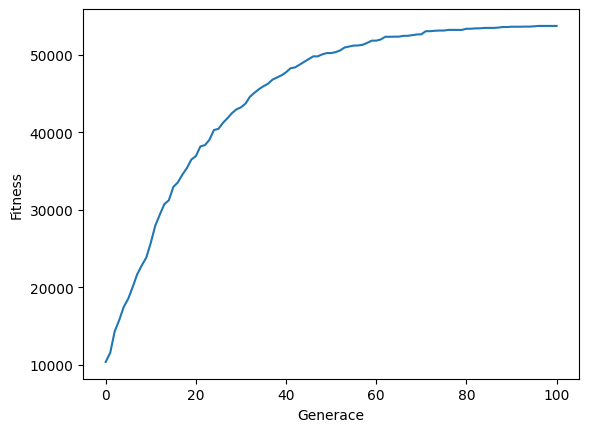

In [20]:
global items
global max_weight


items = []
filepath = "input_data_1000.txt"
with open(filepath, "r") as f:
    for line in f:
        items.append(list(map(int, line.split())))
max_weight = items[0][1]
items.pop(0)
#print(items)
#print(max_weight)
individual_size = len(items)
population_size=10*len(items)
max_generations=100

#print("Start Evolution")
best, population, max_fitness = evolution(population_size,individual_size,max_generations)

print('best fitness overall,', max(max_fitness))
print('best fitness in last generation: ', fitness(best))
print('best individual: ', best)

#100 - 8900
plt.plot(max_fitness)
plt.ylabel('Fitness')
plt.xlabel('Generace')

In [19]:
bag_values = []
bag_weights = []
for i in range(len(best)):
    if best[i] == 1:
        bag_values.append(items[i][0])
        bag_weights.append(items[i][1])
        
print("Bag values: ",bag_values)
print("Bag weights",bag_weights)

Bag values:  [457, 791, 667, 598, 700, 874, 908, 931, 726, 724, 641, 800, 770, 569, 889, 443, 406, 998, 859, 477, 253, 888, 943, 128, 911, 859, 933, 954, 446, 770, 542, 282, 764, 856, 195, 952, 961, 666, 931, 798, 363, 500, 748, 947, 570, 121, 668, 871, 520, 907, 880, 998, 429, 221, 717, 565, 922, 485, 702, 912, 799, 976, 649, 302, 732, 591, 788, 703, 741, 945, 712, 836, 832, 866, 976, 619]
Bag weights [43, 9, 122, 94, 72, 138, 97, 70, 98, 29, 46, 90, 10, 30, 28, 61, 66, 181, 10, 34, 33, 40, 52, 15, 19, 74, 144, 26, 26, 21, 44, 8, 98, 71, 5, 64, 157, 45, 52, 168, 17, 5, 9, 74, 55, 37, 129, 33, 84, 56, 91, 17, 32, 11, 136, 28, 35, 50, 74, 175, 58, 66, 1, 63, 60, 89, 53, 105, 145, 123, 88, 33, 118, 131, 159, 53]
